This code involves recursive computations of **Legendre polynomials**, integration to evaluate the orthogonality of these polynomials (Frobenius integral), and visualization of both **Legendre polynomials** and **spherical Bessel functions**. Below is a detailed breakdown:

---

### **Recursive Computation of Legendre Polynomials**

The `legendre` function computes the $( n )$-th Legendre polynomial $( P_n(x) )$ using the recurrence relation:

$[
P_n(x) = \frac{(2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x)}{n}, \quad \text{for } n \geq 2
]$
Where:
- $( P_0(x) = 1 )$
- $( P_1(x) = x )$

#### **Code:**
```python
def legendre(n, x):
    if n == 0:
        return 1.0
    elif n == 1:
        return x
    else:
        return ((2 * n - 1) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n
```

---

### **Frobenius Integral: Orthogonality of Legendre Polynomials**

The Frobenius integral checks the orthogonality of Legendre polynomials by evaluating:

$
\int_{-1}^{1} P_n(x) P_m(x) \, dx
$

If $( n = m )$, the result is non-zero; otherwise, the result is zero. Integration is performed using `scipy.integrate.quad`.

#### **Code:**
```python
def frobenius_integral(n, m):
    integrand = lambda x: legendre(n, x) * legendre(m, x)
    integral, _ = quad(integrand, -1, 1)
    return integral
```

For example, the integral for $( n = 2 ), ( m = 2 )$ (self-orthogonality) is printed.

---

### **Visualization**

#### **1. Legendre Polynomials**
- A range of $( x )$ values from $(-1)$ to $(1)$ is used.
- The polynomials $( P_0(x), P_1(x), P_2(x), P_3(x) )$ are plotted.

```python
x = np.linspace(-1, 1, 500)
plt.figure(figsize=(12, 6))
for n in range(4):
    plt.plot(x, [legendre(n, xi) for xi in x], label=f'P{n}(x)')
plt.title("Legendre Polynomials")
plt.xlabel("x")
plt.ylabel("P_n(x)")
plt.legend()
plt.grid()
plt.show()
```

#### **2. Spherical Bessel Functions**
- These are solutions to the spherical Bessel differential equation:
  $
  \frac{d^2y}{dr^2} + \frac{2}{r}\frac{dy}{dr} + \left[1 - \frac{n(n+1)}{r^2}\right]y = 0
  $
- $( j_n(r) )$, the spherical Bessel functions of the first kind, are visualized for $( n = 0, 1, 2, 3 )$.

```python
r = np.linspace(0, 20, 500)
plt.figure(figsize=(12, 6))
for n in range(4):
    plt.plot(r, spherical_jn(n, r), label=f'j{n}(r)')
plt.title("Spherical Bessel Functions")
plt.xlabel("r")
plt.ylabel("j_n(r)")
plt.legend()
plt.grid()
plt.show()
```

---

### **Key Observations**

1. **Orthogonality of Legendre Polynomials**:
   - $( \int_{-1}^{1} P_n(x)P_m(x) \, dx = 0 )$ if $( n \neq m )$, validating their orthogonality property.
   - The computed result for $( n = 2, m = 2 )$ is:
     ```plaintext
     Frobenius integral for n=2, m=2: 0.40000
     ```

2. **Legendre Polynomials**:
   - These are symmetric $(even ( P_n(x) ))$ or anti-symmetric $(odd ( P_n(x) ))$ about $( x = 0 )$.
   - The plot illustrates their behavior.

3. **Spherical Bessel Functions**:
   - These oscillate and decay as $( r \to \infty )$.
   - $( j_0(r) )$ begins at $1$, while higher-order functions start at zero.

This code effectively combines mathematical concepts and visualization for a comprehensive understanding of special functions!

Frobenius integral for n=2, m=2: 0.40000


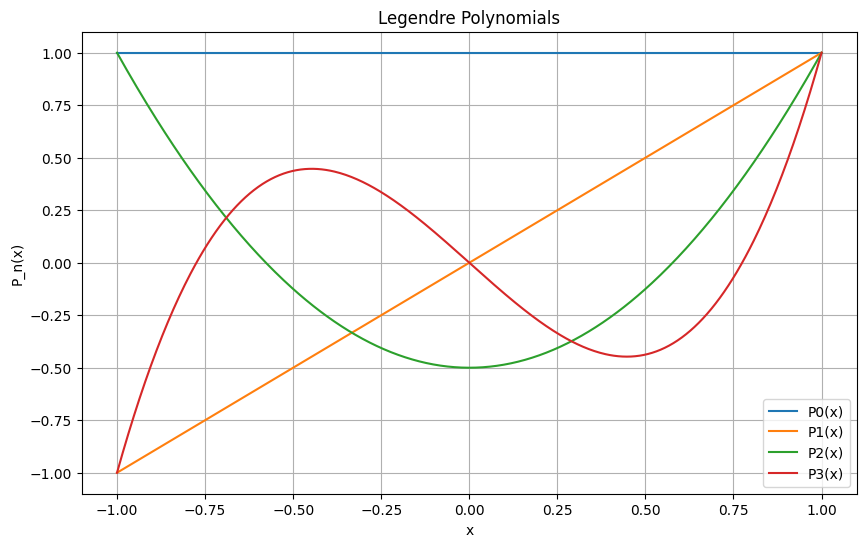

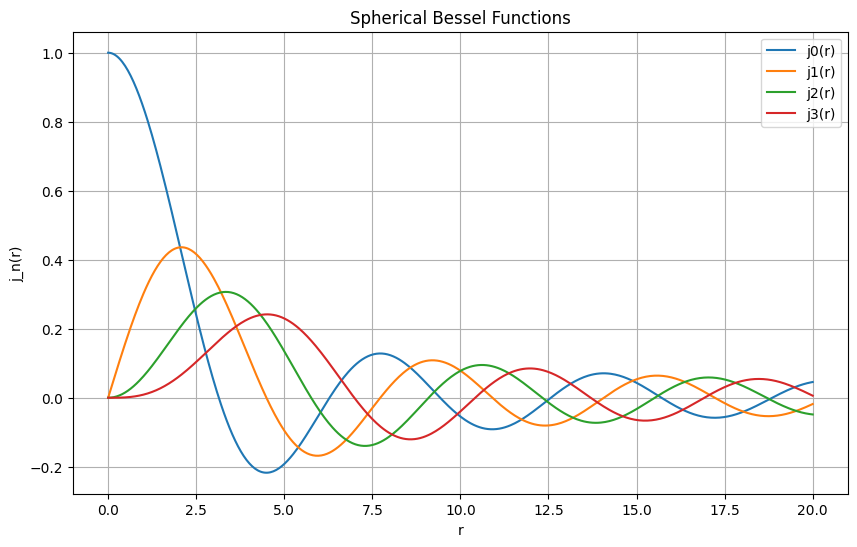

In [9]:
import numpy as np
from scipy.integrate import quad
from scipy.special import spherical_jn
import matplotlib.pyplot as plt

# Recursive computation of Legendre polynomials
def legendre(n, x):
    if n == 0:
        return 1.0
    elif n == 1:
        return x
    else:
        return ((2 * n - 1) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n

# Frobenius method: Computes the integral of the product of two Legendre polynomials
def frobenius_integral(n, m):
    integrand = lambda x: legendre(n, x) * legendre(m, x)
    integral, _ = quad(integrand, -1, 1)  # Integrate over [-1, 1]
    return integral

# Visualization of Legendre Polynomials and Spherical Bessel Functions
def plot_special_functions():
    x = np.linspace(-1, 1, 500)  # Range for Legendre polynomials
    r = np.linspace(0, 20, 500)  # Range for spherical Bessel functions

    # Plot Legendre Polynomials
    plt.figure(figsize=(10, 6))
    for n in range(4):  # Plot P0, P1, P2, P3
        plt.plot(x, [legendre(n, xi) for xi in x], label=f'P{n}(x)')
    plt.title("Legendre Polynomials")
    plt.xlabel("x")
    plt.ylabel("P_n(x)")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Spherical Bessel Functions
    plt.figure(figsize=(10, 6))
    for n in range(4):  # Plot j0, j1, j2, j3
        plt.plot(r, spherical_jn(n, r), label=f'j{n}(r)')
    plt.title("Spherical Bessel Functions")
    plt.xlabel("r")
    plt.ylabel("j_n(r)")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
n, m = 2, 2
result = frobenius_integral(n, m)
print(f"Frobenius integral for n={n}, m={m}: {result:.5f}")

# Visualize the special functions
plot_special_functions()
